<a href="https://colab.research.google.com/github/Meghabaid97/COVID-19/blob/master/Covid19Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Clone repository 
!git clone https://github.com/sidbannet/COVID-19_analysis.git 
%cd ./COVID-19_analysis
!git submodule init
!git submodule update --remote

In [0]:
# Import necessary modules
from tools import collection as cll
import plotly.tools as tls
from plotly.offline import iplot
import plotly.express as px

In [0]:
# Setup data class and parse the database
d = cll.DataClass()
d.parse()

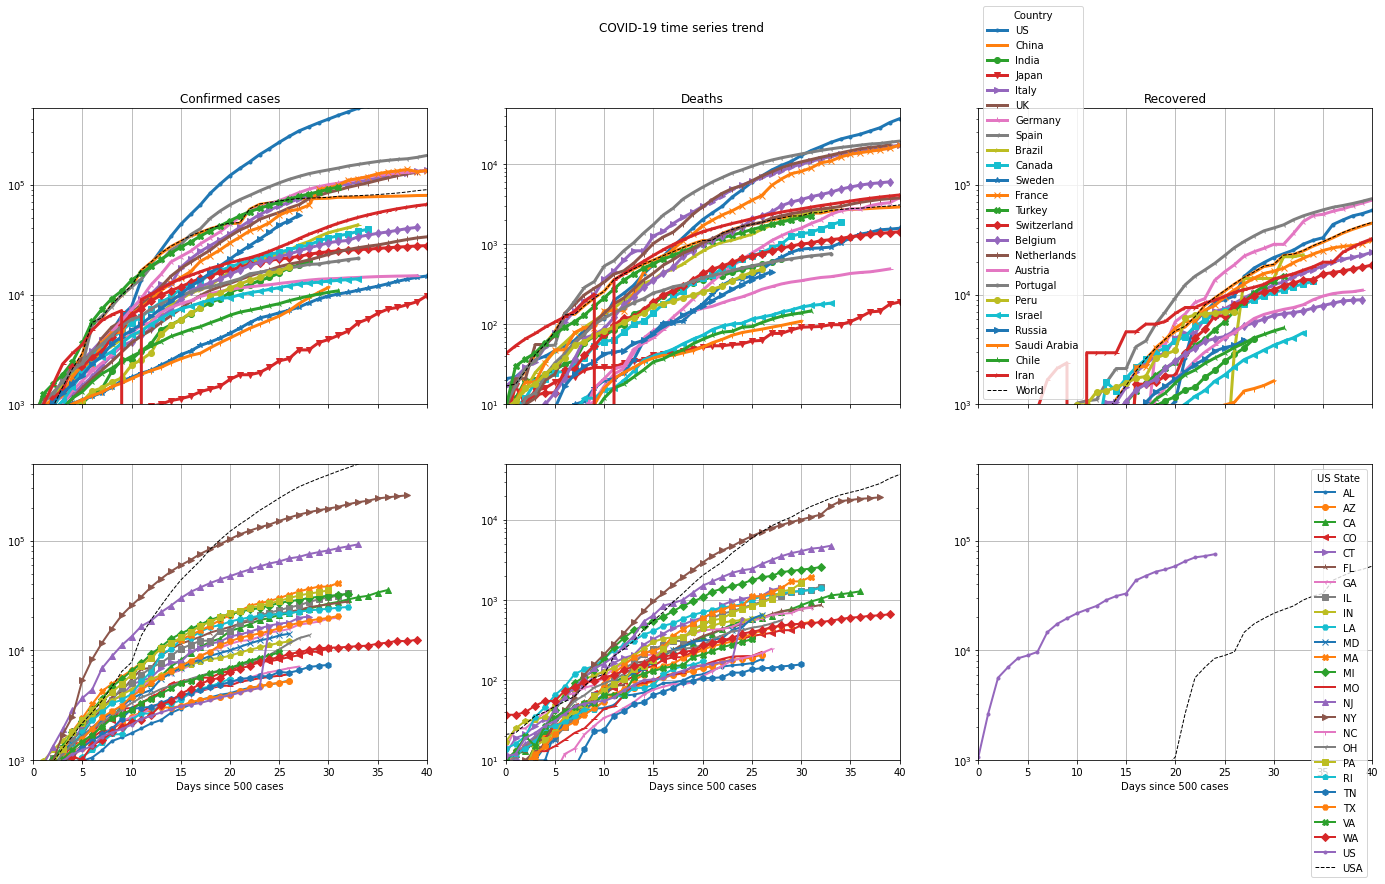

In [5]:
# Make some meaningful timeseries plots 
fig, ax = d.plots_timeseries(
   n_outbreak=500, n_filter_country=10000, n_filter_state=5000) 
fig.set_size_inches(w=24, h=12) 
_ = [axes.set_ylim([10, 50000]) for axes in ax[:, 1].flat] 
_ = ax[0, 0].set_xlim([0, 40]) 
_ = ax[0, 0].get_legend().remove() 
_ = ax[0, 1].get_legend().remove() 
_ = ax[1, 0].get_legend().remove() 
_ = ax[1, 1].get_legend().remove()

In [6]:
# Data frame customized for plotly express geo-scatter
df_global = d.df_global.copy()
date_time = [str(date) for date in df_global.date]
date_str = [str.split(date, ' ')[0] for date in date_time]
df_global['Date'] = date_str
# Geo scatter of confirmed cases
fig = px.scatter_geo(df_global, locations="iso_alpha", color="rate",
                     color_continuous_scale='jet', range_color=[1.0, 2.0],
                     hover_name="country", size="confirmed",
                     animation_frame="Date",
                     title='Confirmed case',
                     size_max=int(80),
                     width=2000, height=1000,
                     projection="natural earth")
fig.show()
# Geo scatter of deaths
fig = px.scatter_geo(df_global, locations="iso_alpha", color="rate",
                     color_continuous_scale='jet', range_color=[1.0, 2.0],
                     hover_name="country", size="death",
                     animation_frame="Date",
                     title='Deaths',
                     size_max=int(80),
                     width=2000, height=1000,
                     projection="natural earth")
fig.show()